<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [3]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [4]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [5]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [6]:
# Answer:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [7]:
# Answer:
movies.duration.sort_values()

389     64
338     66
258     67
293     68
88      68
742     69
351     70
938     75
405     75
303     76
713     78
864     78
489     78
535     79
513     80
853     80
533     80
283     80
297     80
622     80
117     81
541     81
738     81
789     81
330     81
595     82
306     82
174     83
759     83
766     83
      ... 
361    181
166    182
109    183
245    184
132    186
611    187
318    188
184    188
89     189
316    189
40     189
671    191
220    191
424    193
620    194
8      195
385    197
335    197
2      200
7      201
630    202
767    205
17     207
204    212
85     216
445    220
142    224
78     229
157    238
476    242
Name: duration, Length: 979, dtype: int64

In [8]:
movies.loc[movies['duration'] == 64, 'title']

389    Freaks
Name: title, dtype: object

In [9]:
movies.loc[movies['duration'] == 242, 'title']

476    Hamlet
Name: title, dtype: object

#### Create a histogram of duration, choosing an "appropriate" number of bins.

In [10]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


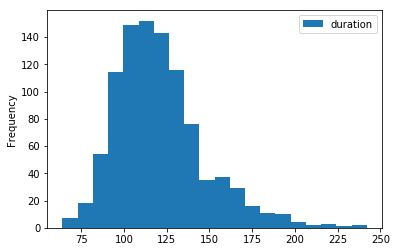

In [11]:
movies.plot(y="duration",kind="hist", bins=20)

In [12]:
# Answer:
#bins = [0,100,200,300]
#movies1 = movies.groupby(pd.cut(movies['duration'], bins=bins)).duration.count()

#print(movies1)
#movies.loc['duration_cat'] = 'low'    # Initially set all values to "low"
#movies.loc[movies.duration.between(1,100), 'duration_cat'] = 'low'  # Initially set all values to "low"
#movies.loc[movies.duration.between(101, 200), 'duration_cat'] = 'med'     # Change 101-200 to "med"
#movies.loc[movies.duration.between(201, 300), 'duration_cat'] = 'high'    # Change 201-300 to "high"
#movies.duration_cat.hist()

#### Use a box plot to display that same data.

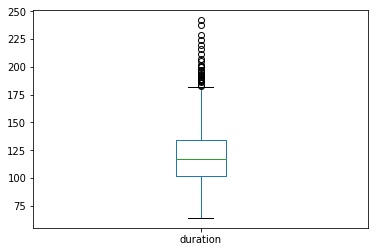

In [13]:
movies.plot(y="duration",kind="box")

## Intermediate level

#### Count how many movies have each of the content ratings.

In [14]:
# Answer:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

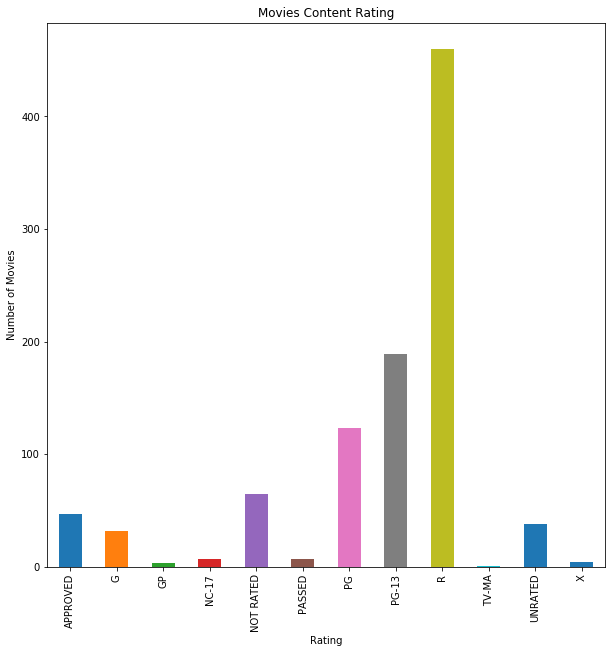

In [15]:
movies.content_rating.value_counts().sort_index().plot(kind='bar', figsize=(10,10)); 
plt.xlabel('Rating');
plt.ylabel('Number of Movies');
plt.title('Movies Content Rating');


#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [16]:
movies.content_rating.replace({'NOT RATED': 'UNRATED', 'APPROVED': 'UNRATED', 'PASSED': 'UNRATED', 'GP': 'UNRATED'}, inplace=True)

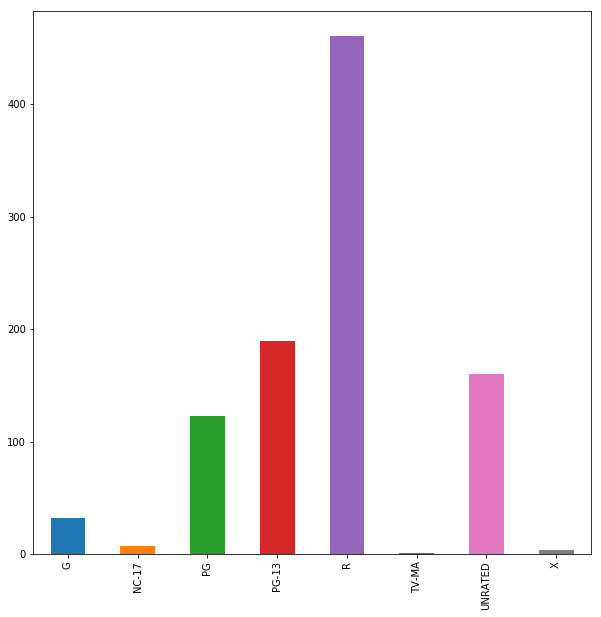

In [17]:
movies.content_rating.value_counts().sort_index().plot(kind='bar', figsize=(10,10)); 

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [18]:
movies.content_rating.replace({'X': 'NC-17', 'TV-MA': 'NC-17'}, inplace=True)

#### Count the number of missing values in each column.

In [19]:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [20]:
# Answer: From above, there are 3 missing values in content_rating
movies[movies.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [21]:
#print((movies.groupby('genre').content_rating.count()))
movies.groupby('genre').content_rating.describe()

,count,unique,top,freq
genre,,,,
Action,135,5,R,67
Adventure,74,5,PG-13,23
Animation,62,5,PG,25
Biography,76,5,R,36
Comedy,156,6,R,73
Crime,124,5,R,87
Drama,278,6,R,143
Family,2,2,G,1
Fantasy,1,1,R,1


In [22]:
#For Movies under the genre Action and Biography, the top frequency rating is R
# hence i will use value "R" to input for content rating for movies "butch cassidy.." and "where eagles dare"
# For movies under genre Adventure, the top frequency rating is PG-13,
#hence i will use value PG-13 for movie "True Grit".

In [23]:
movies.iloc[187,2] = 'R'

In [24]:
movies.iloc[649,2] = 'R'

In [25]:
movies.iloc[936,2] = 'PG-13'

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [26]:
movies[movies.duration < 120].star_rating.mean()

7.838666666666657

In [27]:
movies[movies.duration >= 120].star_rating.mean()

7.948898678414082

In [28]:
# Movies more than or equals to 2 hours have slightly higher ave star ratings 7.95 vs 7.83 of movies less than 2hours.

#### Use a visualization to detect whether there is a relationship between duration and star rating.

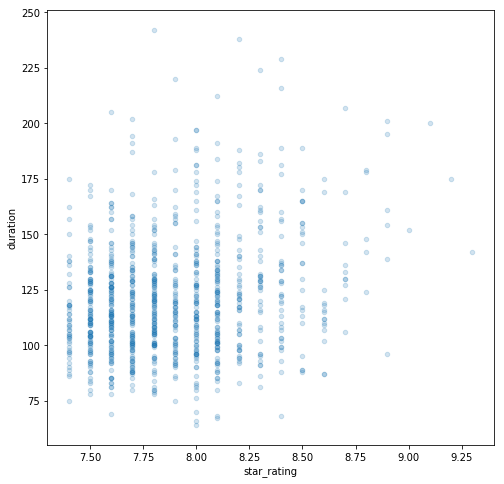

In [29]:
movies.plot(kind='scatter', x='star_rating', y='duration', alpha=0.2, figsize=(8,8))

#### Calculate the average duration for each genre.

In [30]:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

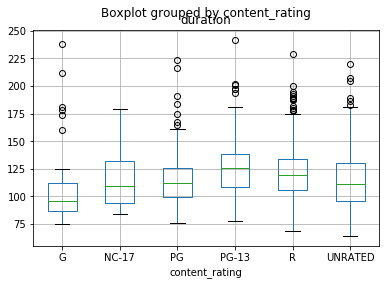

In [31]:
movies.boxplot(column='duration', by='content_rating' )

#### Determine the top rated movie (by star rating) for each genre.

In [32]:
movies.sort_values('star_rating', ascending=False).groupby('genre').title.first()


genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                        Modern Times
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [33]:
dup_titles = movies[movies.title.duplicated()].title
movies[movies.title.isin(dup_titles)]
#the movies are not dupicates as they have different actors in them.

,star_rating,title,content_rating,genre,duration,actors_list
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [34]:
movies.genre.value_counts()>=10

Drama         True
Comedy        True
Action        True
Crime         True
Biography     True
Adventure     True
Animation     True
Horror        True
Mystery       True
Western      False
Sci-Fi       False
Thriller     False
Film-Noir    False
Family       False
Fantasy      False
History      False
Name: genre, dtype: bool

In [35]:
genre1 = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']
movies[movies.genre.isin(genre1)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [36]:
genre_count = movies.genre.value_counts()
genre_count_more10 = genre_count[genre_count >=10].index
movies[movies.genre.isin(genre_count_more10)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [37]:
ave_star_rate = movies.groupby('genre').star_rating.mean()
ave_star_rate_genre_more10 = ave_star_rate[movies.genre.value_counts()>=10]
ave_star_rate_genre_more10

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [38]:
genre_ratings = movies.groupby('genre').star_rating.agg(['count', 'mean'])
genre_ratings[genre_ratings['count'] >= 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [47]:
#movies.actors_list.value_counts()
#my_list = [str(movies.actors_list[x]) for x in range(len(movies.actors_list))]
actors_name = [x for y in movies.actors_list for x in y]
print(actors_name)


['[', 'u', "'", 'T', 'i', 'm', ' ', 'R', 'o', 'b', 'b', 'i', 'n', 's', "'", ',', ' ', 'u', "'", 'M', 'o', 'r', 'g', 'a', 'n', ' ', 'F', 'r', 'e', 'e', 'm', 'a', 'n', "'", ',', ' ', 'u', "'", 'B', 'o', 'b', ' ', 'G', 'u', 'n', 't', 'o', 'n', "'", ']', '[', 'u', "'", 'M', 'a', 'r', 'l', 'o', 'n', ' ', 'B', 'r', 'a', 'n', 'd', 'o', "'", ',', ' ', 'u', "'", 'A', 'l', ' ', 'P', 'a', 'c', 'i', 'n', 'o', "'", ',', ' ', 'u', "'", 'J', 'a', 'm', 'e', 's', ' ', 'C', 'a', 'a', 'n', "'", ']', '[', 'u', "'", 'A', 'l', ' ', 'P', 'a', 'c', 'i', 'n', 'o', "'", ',', ' ', 'u', "'", 'R', 'o', 'b', 'e', 'r', 't', ' ', 'D', 'e', ' ', 'N', 'i', 'r', 'o', "'", ',', ' ', 'u', "'", 'R', 'o', 'b', 'e', 'r', 't', ' ', 'D', 'u', 'v', 'a', 'l', 'l', "'", ']', '[', 'u', "'", 'C', 'h', 'r', 'i', 's', 't', 'i', 'a', 'n', ' ', 'B', 'a', 'l', 'e', "'", ',', ' ', 'u', "'", 'H', 'e', 'a', 't', 'h', ' ', 'L', 'e', 'd', 'g', 'e', 'r', "'", ',', ' ', 'u', "'", 'A', 'a', 'r', 'o', 'n', ' ', 'E', 'c', 'k', 'h', 'a', 'r', 't',